In [76]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from sklearn import metrics
from datetime import datetime
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

In [78]:
data = pd.read_csv("AdultCensus.csv")
data.head()

,Age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


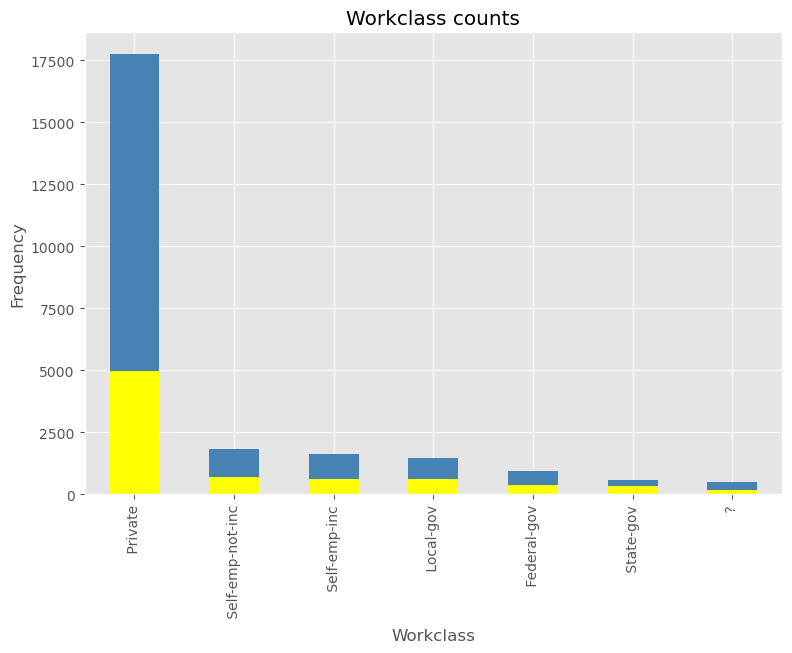

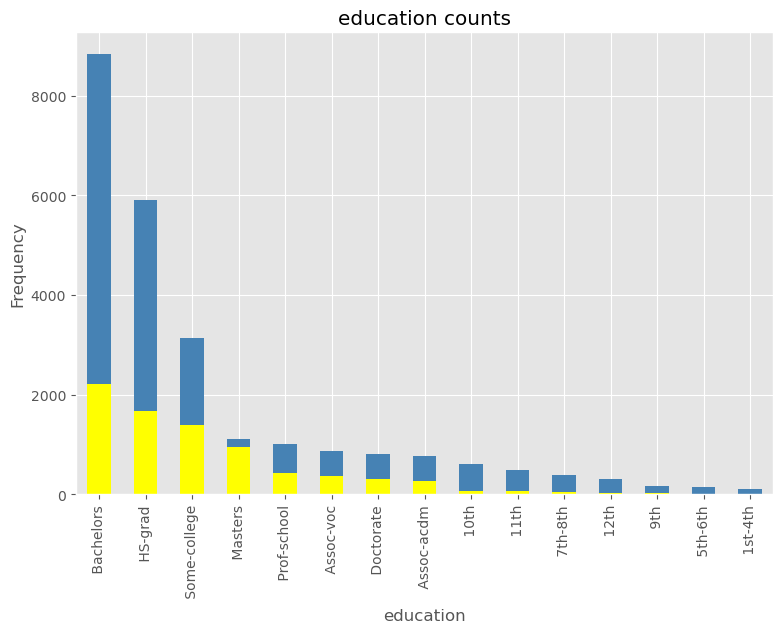

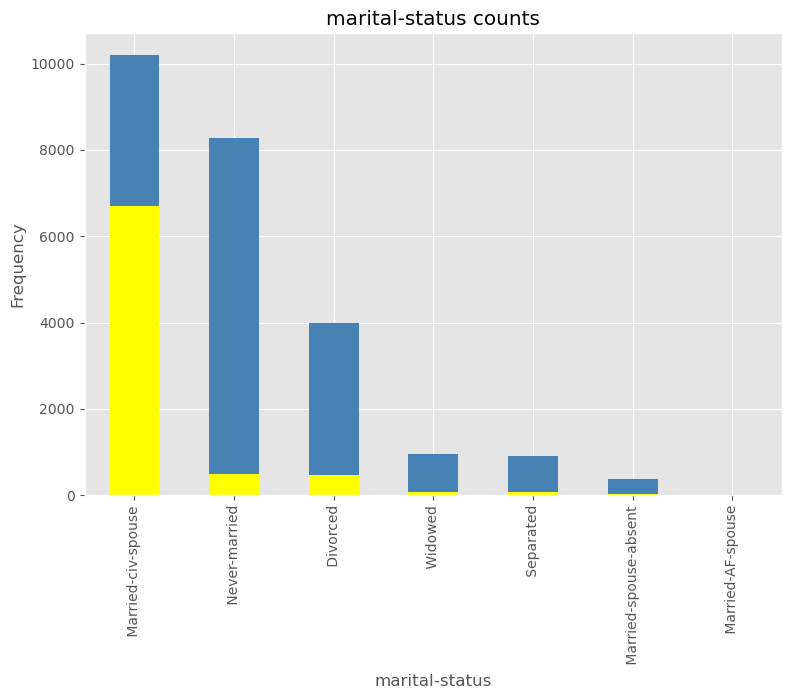

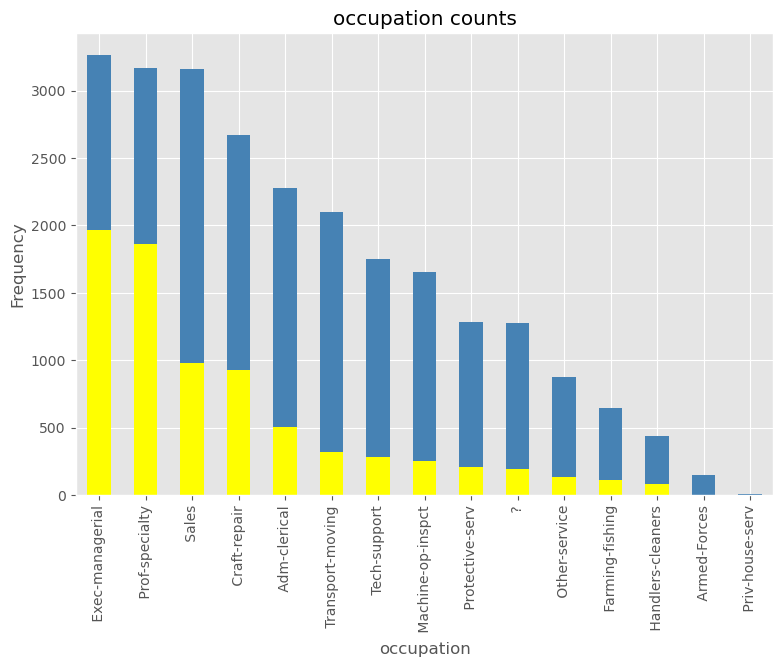

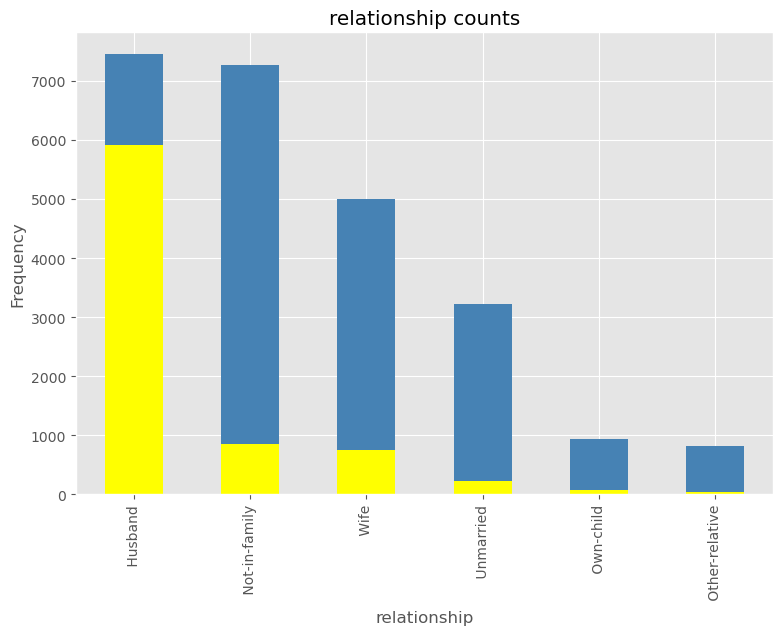

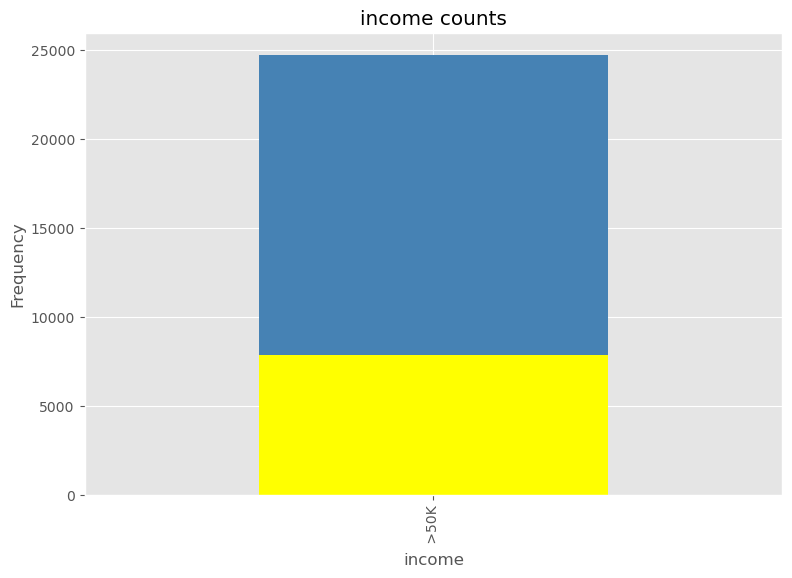

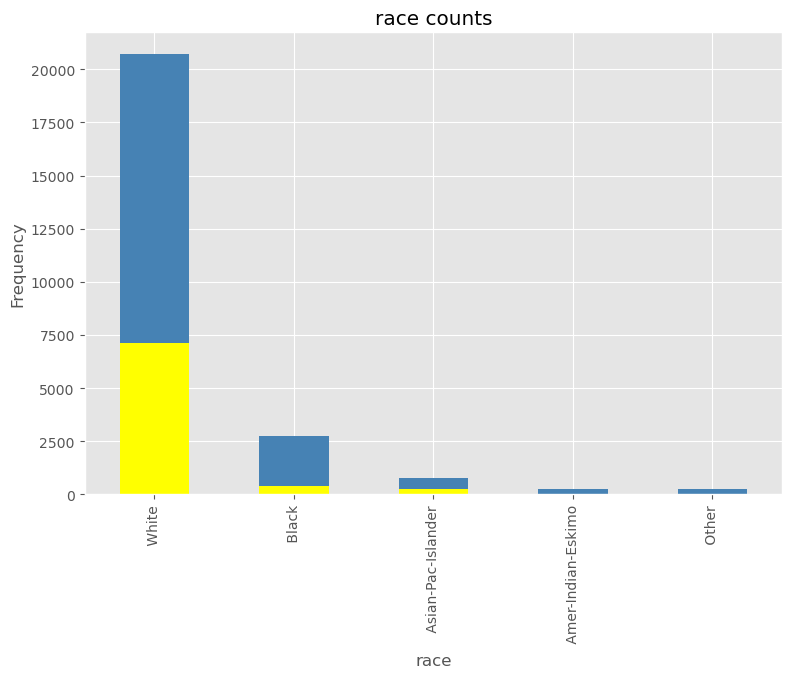

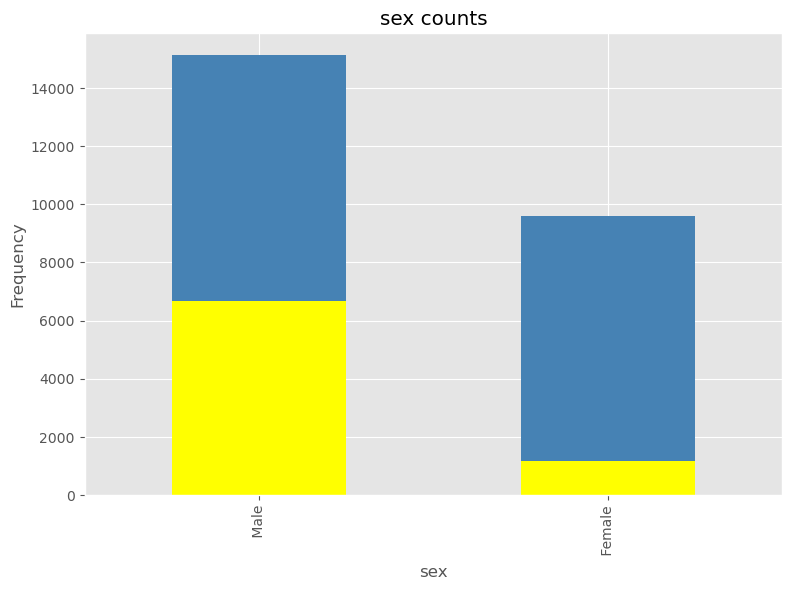

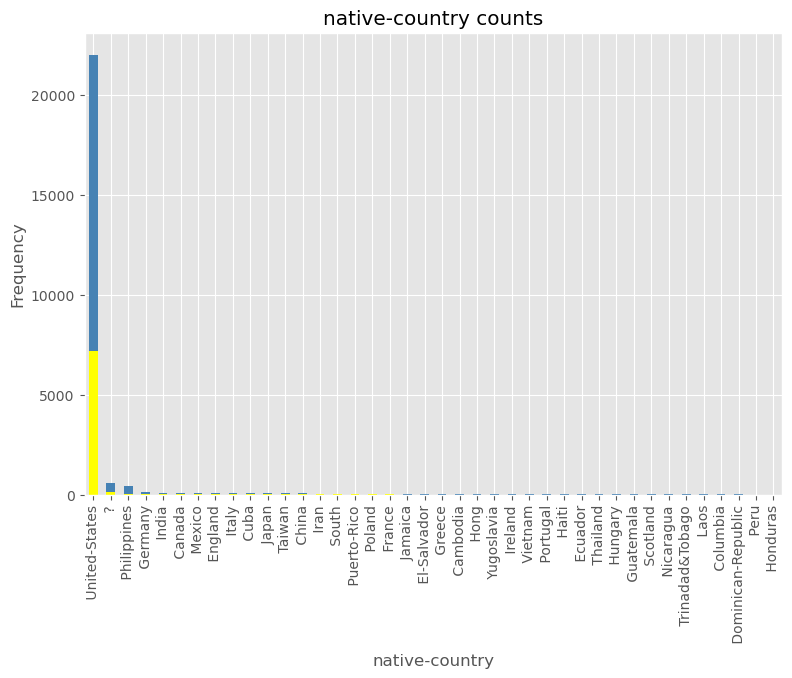

In [79]:
def plot_barchart(data, col):
    low_income = data[data['income'].str.contains('<=50K')][col].value_counts()
    high_income =data[data['income'].str.contains('>50K')][col].value_counts()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    low_income.plot.bar(ax = ax, color='steelblue')
    high_income.plot.bar(ax = ax, color='yellow')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
    
categorical_features = ['Workclass', 'education', 'marital-status', 'occupation', 'relationship','income', 'race', 'sex',  'native-country']

for col in categorical_features:
    plot_barchart(data, col)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

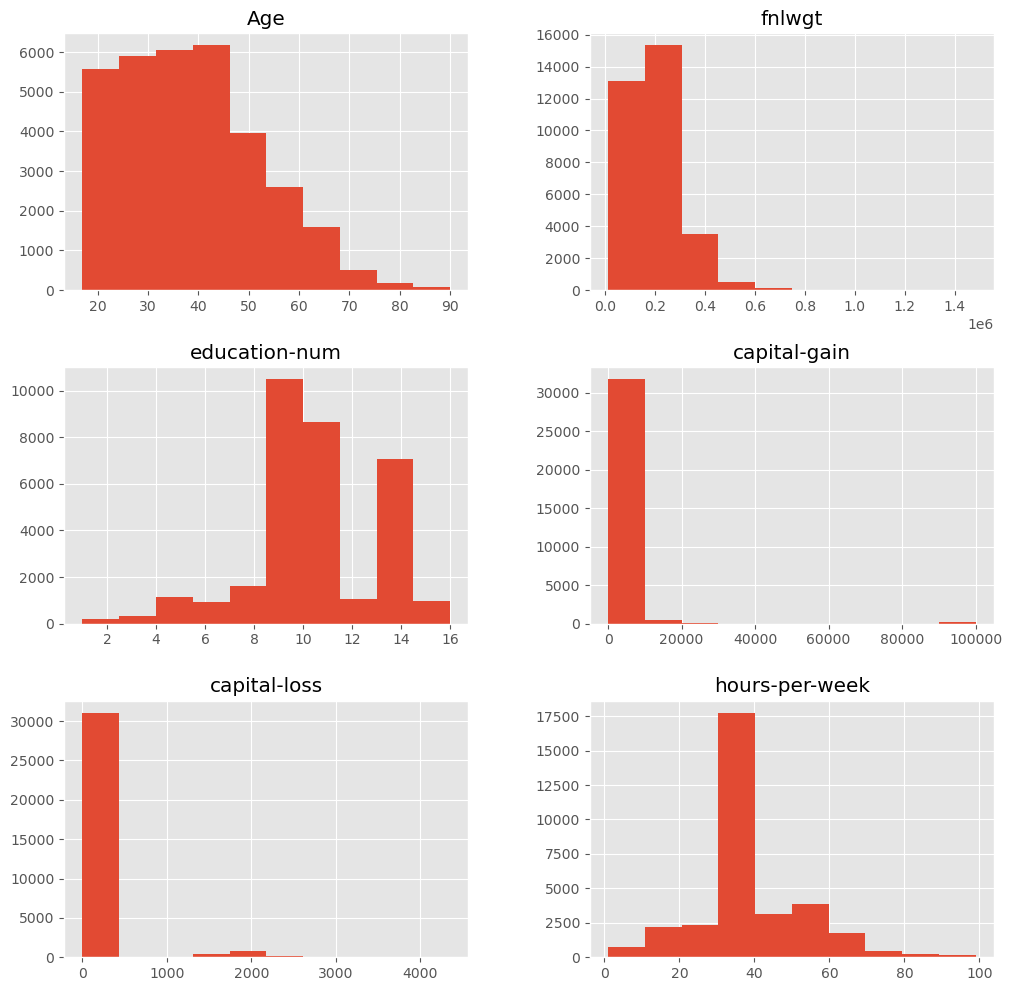

In [80]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 12
data[['Age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']].hist()


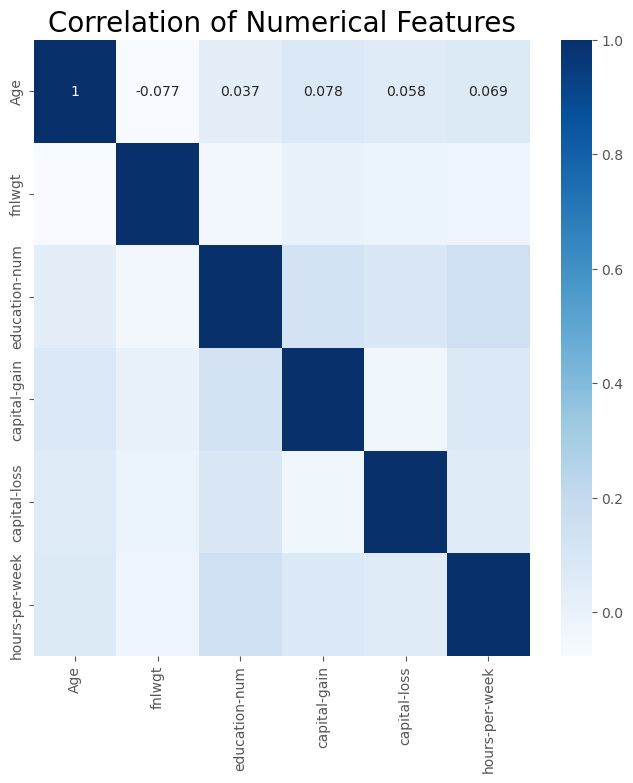

In [81]:

num_features=['Age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

fig, ax = plt.subplots(figsize=(8, 8))
p = sns.heatmap(data[num_features].corr(), annot=True, cmap="Blues")
plt.title("Correlation of Numerical Features", fontsize=20)
plt.show()


In [82]:
var, counts=np.unique(data['Workclass'], return_counts=True)
most_freq_var = var[np.argmax(counts, axis = 0)]
data['Workclass'][data['Workclass'] == '?'] = most_freq_var 

In [83]:
var, counts=np.unique(data['occupation'], return_counts=True)
most_freq_var = var[np.argmax(counts, axis = 0)]
data['occupation'][data['occupation'] == '?'] = most_freq_var 
data['occupation'].value_counts()

occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: count, dtype: int64

In [84]:
var, counts=np.unique(data['native-country'], return_counts=True)
most_freq_var = var[np.argmax(counts, axis = 0)]
data['native-country'][data['native-country'] == '?'] = most_freq_var 
data['native-country'].value_counts()

native-country
 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                  

In [85]:
data.head(100)

,Age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,29,Local-gov,115585,Some-college,10,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,50,United-States,<=50K
96,48,Self-emp-not-inc,191277,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,60,United-States,>50K
97,37,Private,202683,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,48,United-States,>50K
98,48,Private,171095,Assoc-acdm,12,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,England,<=50K


In [86]:
HighSchool_Grad = ['HS-grad','12th','11th','10th','9th']
Elementary = ['1st-4th','5th-6th','7th-8th']

In [87]:
data['education'].replace(to_replace = HighSchool_Grad,value = 'HighSchool-Grad',inplace = True)
data['education'].replace(to_replace = Elementary,value = 'elementary_school',inplace = True)

data['education'].value_counts()

education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64

In [88]:
married= ['Married-spouse-absent','Married-civ-spouse','Married-AF-spouse']
separated = ['Separated','Divorced']

#replace elements in list.
data['marital-status'].replace(to_replace = married ,value = 'Married',inplace = True)
data['marital-status'].replace(to_replace = separated,value = 'Separated',inplace = True)

data['marital-status'].value_counts()

marital-status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64

In [89]:
self_employed = ['Self-emp-not-inc','Self-emp-inc']
govt_employees = ['Local-gov','State-gov','Federal-gov']

#replace elements in list.
data['Workclass'].replace(to_replace = self_employed ,value = 'Self_employed',inplace = True)
data['Workclass'].replace(to_replace = govt_employees,value = 'Govt_employees',inplace = True)

data['Workclass'].value_counts()

Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [90]:
del_cols = ['education-num']
data.drop(labels = del_cols,axis = 1,inplace = True)

In [91]:
num_col_new = ['Age','capital-gain', 'capital-loss',
       'hours-per-week','fnlwgt']
cat_col_new = ['Workclass', 'education', 'marital-status', 'occupation','relationship',
               'race', 'sex', 'income']

In [92]:
data.head()


,Age,Workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [93]:
print(f"Target: 'Income'\nUnique Values in Income: {data.income.unique()}\nNumber of unique values: {data.income.nunique()}")

Target: 'Income'
Unique Values in Income: [' <=50K' ' >50K']
Number of unique values: 2


In [94]:
data['income'] = data['income'].str.replace('<=50K', '0')
data['income'] = data['income'].str.replace('>50K', '1')
data['income'] = data['income'].astype(np.int64)


In [95]:
data.income.dtypes

dtype('int64')

In [96]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

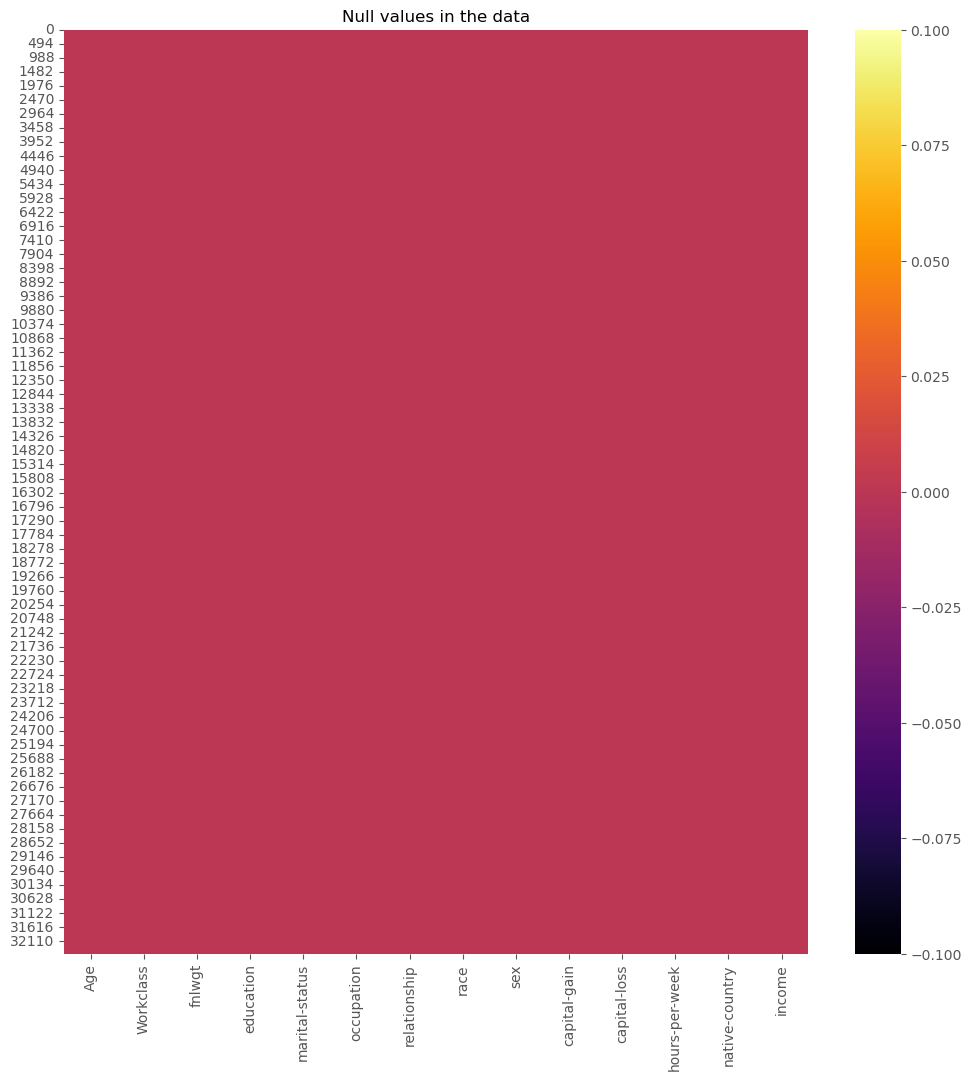

In [98]:
plt.title("Null values in the data", fontsize = 12)
sns.heatmap(data.isnull(), cmap = 'inferno')
plt.show()

In [99]:
print("Datatype of every feature: ")
data.dtypes

Datatype of every feature: 


Age                int64
Workclass         object
fnlwgt             int64
education         object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income             int64
dtype: object

In [100]:
print("Number of unique values in every feature: ")
data.nunique()

Number of unique values in every feature: 


Age                  73
Workclass             9
fnlwgt            21648
education            16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
income                2
dtype: int64

In [101]:
data.describe()

,Age,fnlwgt,capital-gain,capital-loss,hours-per-week,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000,1.000000


In [102]:
data['occupation'] = data['occupation'].replace(' ?', data['occupation'].mode()[0])
data['Workclass'] = data['Workclass'].replace(' ?', data['Workclass'].mode()[0])
data['native-country'] = data['native-country'].replace(' ?', data['native-country'].mode()[0])


In [103]:
data['Workclass'].value_counts()

Workclass
 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [104]:
data['occupation'].value_counts()

occupation
 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: count, dtype: int64

In [105]:
data['native-country'].value_counts()

native-country
 United-States                 29753
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                

In [106]:
ds = data.copy()

In [107]:
ds.head(100)

,Age,Workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,29,Local-gov,115585,Some-college,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,50,United-States,0
96,48,Self-emp-not-inc,191277,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,60,United-States,1
97,37,Private,202683,Some-college,Married-civ-spouse,Sales,Husband,White,Male,0,0,48,United-States,1
98,48,Private,171095,Assoc-acdm,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,England,0


In [108]:
workclass_enc = (ds.groupby('Workclass').size()) / len(ds)
print(workclass_enc)

ds['workclass_enc'] = ds['Workclass'].apply(lambda x : workclass_enc[x])
ds['workclass_enc'].head(100)

Workclass
 Federal-gov         0.029483
 Local-gov           0.064279
 Never-worked        0.000215
 Private             0.753417
 Self-emp-inc        0.034274
 Self-emp-not-inc    0.078038
 State-gov           0.039864
 Without-pay         0.000430
dtype: float64


0     0.039864
1     0.078038
2     0.753417
3     0.753417
4     0.753417
        ...   
95    0.064279
96    0.078038
97    0.753417
98    0.753417
99    0.029483
Name: workclass_enc, Length: 100, dtype: float64

In [109]:
ds.drop(['Workclass'], axis = 1, inplace = True)

In [110]:
occupation_enc = (ds.groupby('occupation').size()) / len(ds)
print(occupation_enc)

ds['occupation_enc'] = ds['occupation'].apply(lambda x : occupation_enc[x])
ds['occupation_enc'].head(100)

occupation
 Adm-clerical         0.115783
 Armed-Forces         0.000276
 Craft-repair         0.125887
 Exec-managerial      0.124873
 Farming-fishing      0.030527
 Handlers-cleaners    0.042075
 Machine-op-inspct    0.061485
 Other-service        0.101195
 Priv-house-serv      0.004576
 Prof-specialty       0.183747
 Protective-serv      0.019932
 Sales                0.112097
 Tech-support         0.028500
 Transport-moving     0.049046
dtype: float64


0     0.115783
1     0.124873
2     0.042075
3     0.042075
4     0.183747
        ...   
95    0.042075
96    0.183747
97    0.112097
98    0.124873
99    0.101195
Name: occupation_enc, Length: 100, dtype: float64

In [111]:
education_enc = (ds.groupby('education').size()) / len(ds)
print(education_enc)

ds['education_enc'] = ds['education'].apply(lambda x : education_enc[x])
ds['education_enc'].head(100)

education
 10th            0.028654
 11th            0.036086
 12th            0.013298
 1st-4th         0.005160
 5th-6th         0.010227
 7th-8th         0.019840
 9th             0.015786
 Assoc-acdm      0.032769
 Assoc-voc       0.042443
 Bachelors       0.164461
 Doctorate       0.012684
 HS-grad         0.322502
 Masters         0.052916
 Preschool       0.001566
 Prof-school     0.017690
 Some-college    0.223918
dtype: float64


0     0.164461
1     0.164461
2     0.322502
3     0.036086
4     0.164461
        ...   
95    0.223918
96    0.012684
97    0.223918
98    0.032769
99    0.322502
Name: education_enc, Length: 100, dtype: float64

In [112]:
sex_enc = (ds.groupby('sex').size()) / len(ds)
print(sex_enc)

ds['sex_enc'] = ds['sex'].apply(lambda x : sex_enc[x])
ds['sex_enc'].head(100)

sex
 Female    0.330795
 Male      0.669205
dtype: float64


0     0.669205
1     0.669205
2     0.669205
3     0.669205
4     0.330795
        ...   
95    0.669205
96    0.669205
97    0.669205
98    0.330795
99    0.669205
Name: sex_enc, Length: 100, dtype: float64

In [113]:
marital_enc = (ds.groupby('marital-status').size()) / len(ds)
print(marital_enc)

ds['marital_enc'] = ds['marital-status'].apply(lambda x : marital_enc[x])
ds['marital_enc'].head(100)

marital-status
 Divorced                 0.136452
 Married-AF-spouse        0.000706
 Married-civ-spouse       0.459937
 Married-spouse-absent    0.012837
 Never-married            0.328092
 Separated                0.031479
 Widowed                  0.030497
dtype: float64


0     0.328092
1     0.459937
2     0.136452
3     0.459937
4     0.459937
        ...   
95    0.328092
96    0.459937
97    0.459937
98    0.136452
99    0.328092
Name: marital_enc, Length: 100, dtype: float64

In [114]:
race_enc = (ds.groupby('race').size()) / len(ds)
print(race_enc)

ds['race_enc'] = ds['race'].apply(lambda x : race_enc[x])
ds['race_enc'].head(100)

race
 Amer-Indian-Eskimo    0.009551
 Asian-Pac-Islander    0.031909
 Black                 0.095943
 Other                 0.008323
 White                 0.854274
dtype: float64


0     0.854274
1     0.854274
2     0.854274
3     0.095943
4     0.095943
        ...   
95    0.854274
96    0.854274
97    0.854274
98    0.854274
99    0.095943
Name: race_enc, Length: 100, dtype: float64

In [115]:
relationship_enc = (ds.groupby('relationship').size()) / len(ds)
print(relationship_enc)

ds['relationship_enc'] = ds['relationship'].apply(lambda x : relationship_enc[x])
ds['relationship_enc'].head(100)

relationship
 Husband           0.405178
 Not-in-family     0.255060
 Other-relative    0.030128
 Own-child         0.155646
 Unmarried         0.105832
 Wife              0.048156
dtype: float64


0     0.255060
1     0.405178
2     0.255060
3     0.405178
4     0.048156
        ...   
95    0.255060
96    0.405178
97    0.405178
98    0.105832
99    0.155646
Name: relationship_enc, Length: 100, dtype: float64

In [116]:
ds.drop(['occupation'], axis = 1, inplace = True)

In [117]:
ds.drop(['education'], axis = 1, inplace = True)

In [118]:
ds.drop(['race'], axis = 1, inplace = True)

In [119]:
ds.drop(['sex'], axis = 1, inplace = True)

In [120]:
ds.drop(['relationship'], axis = 1, inplace = True)

In [121]:
ds.drop(['marital-status'], axis = 1, inplace = True)

In [122]:
native_enc = (ds.groupby('native-country').size()) / len(ds)
print(native_enc)

ds['native_enc'] = ds['native-country'].apply(lambda x : native_enc[x])
ds['native_enc'].head(100)

native-country
 Cambodia                      0.000584
 Canada                        0.003716
 China                         0.002303
 Columbia                      0.001812
 Cuba                          0.002918
 Dominican-Republic            0.002150
 Ecuador                       0.000860
 El-Salvador                   0.003255
 England                       0.002764
 France                        0.000891
 Germany                       0.004207
 Greece                        0.000891
 Guatemala                     0.001966
 Haiti                         0.001351
 Holand-Netherlands            0.000031
 Honduras                      0.000399
 Hong                          0.000614
 Hungary                       0.000399
 India                         0.003071
 Iran                          0.001321
 Ireland                       0.000737
 Italy                         0.002242
 Jamaica                       0.002488
 Japan                         0.001904
 Laos                    

0     0.913762
1     0.913762
2     0.913762
3     0.913762
4     0.002918
        ...   
95    0.913762
96    0.913762
97    0.913762
98    0.002764
99    0.913762
Name: native_enc, Length: 100, dtype: float64

In [123]:
ds.drop(['native-country'], axis = 1, inplace = True)

In [124]:
ds.head()

,Age,fnlwgt,capital-gain,capital-loss,hours-per-week,income,workclass_enc,occupation_enc,education_enc,sex_enc,marital_enc,race_enc,relationship_enc,native_enc
0,39,77516,2174,0,40,0,0.039864,0.115783,0.164461,0.669205,0.328092,0.854274,0.255060,0.913762
1,50,83311,0,0,13,0,0.078038,0.124873,0.164461,0.669205,0.459937,0.854274,0.405178,0.913762
2,38,215646,0,0,40,0,0.753417,0.042075,0.322502,0.669205,0.136452,0.854274,0.255060,0.913762
3,53,234721,0,0,40,0,0.753417,0.042075,0.036086,0.669205,0.459937,0.095943,0.405178,0.913762
4,28,338409,0,0,40,0,0.753417,0.183747,0.164461,0.330795,0.459937,0.095943,0.048156,0.002918


In [125]:
plt.style.use('default')

In [126]:
plt.style.use('ggplot')

BoxPlots of the features:


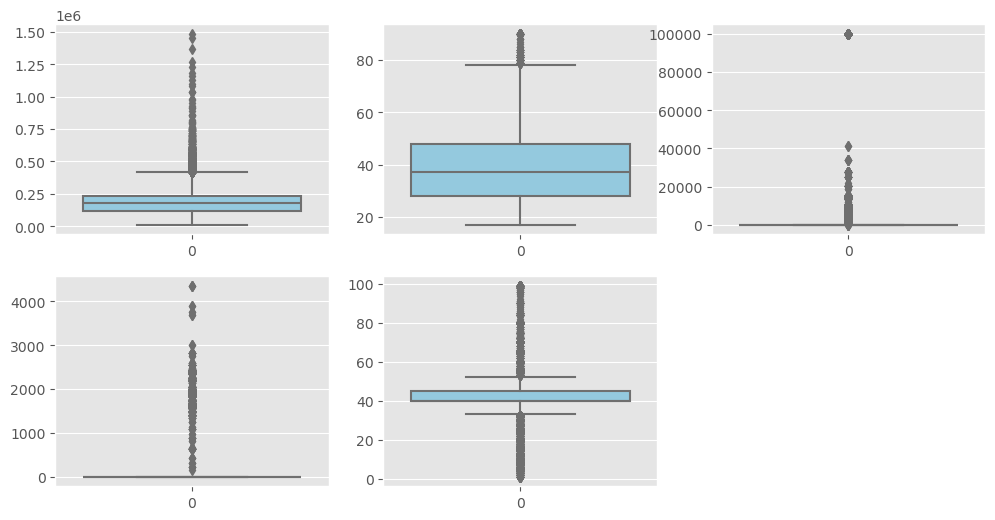

In [127]:
clist = ['fnlwgt','Age','capital-gain','capital-loss','hours-per-week']
plt.figure(figsize = (12,6))
for i in range(0, len(clist)):
    plt.subplot(2,3, i+1)
    sns.boxplot(ds[clist[i]], color = 'skyblue')
print("BoxPlots of the features:")
plt.show()

In [128]:
from scipy.stats import zscore

zabs = np.abs(zscore(ds.loc[:,'fnlwgt':'hours-per-week']))
print(np.shape(np.where(zabs >= 3)))
new_ds = ds[(zabs < 3).all(axis = 1)]
new_ds

(2, 2472)


,Age,fnlwgt,capital-gain,capital-loss,hours-per-week,income,workclass_enc,occupation_enc,education_enc,sex_enc,marital_enc,race_enc,relationship_enc,native_enc
0,39,77516,2174,0,40,0,0.039864,0.115783,0.164461,0.669205,0.328092,0.854274,0.255060,0.913762
1,50,83311,0,0,13,0,0.078038,0.124873,0.164461,0.669205,0.459937,0.854274,0.405178,0.913762
2,38,215646,0,0,40,0,0.753417,0.042075,0.322502,0.669205,0.136452,0.854274,0.255060,0.913762
3,53,234721,0,0,40,0,0.753417,0.042075,0.036086,0.669205,0.459937,0.095943,0.405178,0.913762
4,28,338409,0,0,40,0,0.753417,0.183747,0.164461,0.330795,0.459937,0.095943,0.048156,0.002918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,0,0,38,0,0.753417,0.028500,0.032769,0.330795,0.459937,0.854274,0.048156,0.913762
32557,40,154374,0,0,40,1,0.753417,0.061485,0.322502,0.669205,0.459937,0.854274,0.405178,0.913762
32558,58,151910,0,0,40,0,0.753417,0.115783,0.322502,0.330795,0.030497,0.854274,0.105832,0.913762
32559,22,201490,0,0,20,0,0.753417,0.115783,0.322502,0.669205,0.328092,0.854274,0.155646,0.913762


In [129]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
new_ds.loc[:,'Age':'hours-per-week'] = scale.fit_transform(new_ds.loc[:,'Age':'hours-per-week'])
new_ds

,Age,fnlwgt,capital-gain,capital-loss,hours-per-week,income,workclass_enc,occupation_enc,education_enc,sex_enc,marital_enc,race_enc,relationship_enc,native_enc
0,0.301370,0.132035,0.098639,0.0,0.493151,0,0.039864,0.115783,0.164461,0.669205,0.328092,0.854274,0.255060,0.913762
1,0.452055,0.143765,0.000000,0.0,0.123288,0,0.078038,0.124873,0.164461,0.669205,0.459937,0.854274,0.405178,0.913762
2,0.287671,0.411625,0.000000,0.0,0.493151,0,0.753417,0.042075,0.322502,0.669205,0.136452,0.854274,0.255060,0.913762
3,0.493151,0.450235,0.000000,0.0,0.493151,0,0.753417,0.042075,0.036086,0.669205,0.459937,0.095943,0.405178,0.913762
4,0.150685,0.660111,0.000000,0.0,0.493151,0,0.753417,0.183747,0.164461,0.330795,0.459937,0.095943,0.048156,0.002918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.495942,0.000000,0.0,0.465753,0,0.753417,0.028500,0.032769,0.330795,0.459937,0.854274,0.048156,0.913762
32557,0.315068,0.287604,0.000000,0.0,0.493151,1,0.753417,0.061485,0.322502,0.669205,0.459937,0.854274,0.405178,0.913762
32558,0.561644,0.282617,0.000000,0.0,0.493151,0,0.753417,0.115783,0.322502,0.330795,0.030497,0.854274,0.105832,0.913762
32559,0.068493,0.382972,0.000000,0.0,0.219178,0,0.753417,0.115783,0.322502,0.669205,0.328092,0.854274,0.155646,0.913762


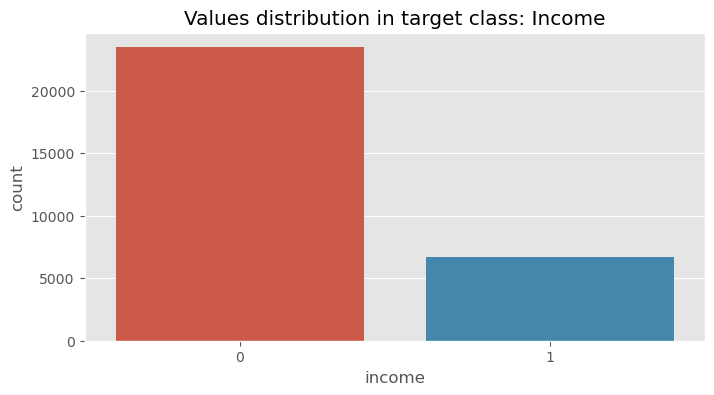

In [130]:
plt.figure(figsize = (8, 4))
plt.title("Values distribution in target class: Income")
sns.countplot(data = new_ds, x = 'income')
plt.show()

In [131]:
from imblearn.combine import SMOTETomek
x = new_ds.loc[:,"Age":"hours-per-week"]
y = new_ds.loc[:,"income"]
smk = SMOTETomek()
x_new, y_new = smk.fit_resample(x, y)

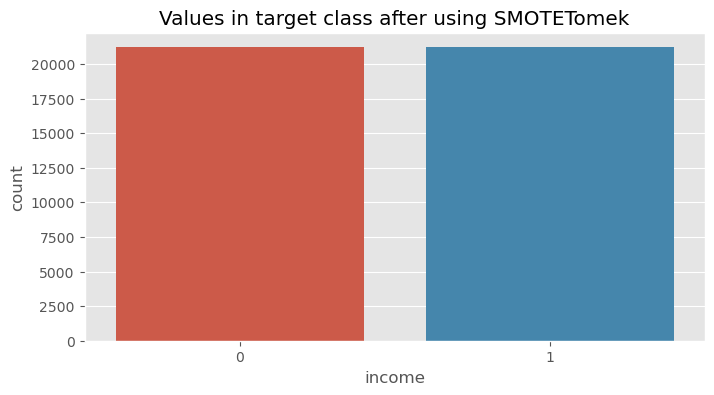

In [132]:
plt.figure(figsize = (8, 4))
plt.title("Values in target class after using SMOTETomek")
sns.countplot(x = y_new)
plt.show()

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

max_accuracy = 0
best_rs = 0
for i in range(1, 150):
    x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size = 0.30, random_state = i)
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    pred = lg.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > max_accuracy: # after each iteration, acc is replace by the best possible accuracy
        max_accuracy = acc
        best_rs = i
print(f"Best Random State is {best_rs}, {max_accuracy*100}")

Best Random State is 105, 71.60717093882685


# x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size = 0.30, random_state = 67)

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [135]:
# For Logistic Regression
lg = LogisticRegression()
lg.fit(x_train, y_train)
pred_lg = lg.predict(x_test)
print("Accuracy Score of Logistic Regression model is", accuracy_score(y_test, pred_lg)*100)

# For Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
pred_dtc = dtc.predict(x_test)
print("Accuracy Score of Decision Tree Classifier model is", accuracy_score(y_test, pred_dtc)*100)

# For K-Nearest Neighbour Classifier
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(x_train, y_train)
pred_knc = knc.predict(x_test)
print("Accuracy Score of K-Nearest Neighbour Classifier model is", accuracy_score(y_test, pred_knc)*100)

# For Support Vector Classifier
svc = SVC(kernel = 'rbf')
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)
print("Accuracy Score of Support Vector Classifier model is", accuracy_score(y_test, pred_svc)*100)

# For Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)
print("Accuracy Score of Random Forest model is", accuracy_score(y_test, pred_rfc)*100)



Accuracy Score of Logistic Regression model is 71.04890706085862
Accuracy Score of Decision Tree Classifier model is 84.21135398647586
Accuracy Score of K-Nearest Neighbour Classifier model is 79.87891177858154
Accuracy Score of Support Vector Classifier model is 73.83236357917912
Accuracy Score of Random Forest model is 86.49158672747286


In [136]:
from sklearn.model_selection import cross_val_score

lg_scores = cross_val_score(lg, x_new, y_new, cv = 10) # cross validating the model
print(lg_scores) # accuracy scores of each cross validation cycle
print(f"Mean of accuracy scores is for Logistic Regression is {lg_scores.mean()*100}\n")

dtc_scores = cross_val_score(dtc, x_new, y_new, cv = 10)
print(dtc_scores)
print(f"Mean of accuracy scores is for Decision Tree Classifier is {dtc_scores.mean()*100}\n")

knc_scores = cross_val_score(knc, x_new, y_new, cv = 10)
print(knc_scores)
print(f"Mean of accuracy scores is for KNN Classifier is {knc_scores.mean()*100}\n")

svc_scores = cross_val_score(svc, x_new, y_new, cv = 10)
print(svc_scores)
print(f"Mean of accuracy scores is for SVC Classifier is {svc_scores.mean()*100}\n")

rfc_scores = cross_val_score(rfc, x_new, y_new, cv = 10)
print(rfc_scores)
print(f"Mean of accuracy scores is for Random Forest Classifier is {rfc_scores.mean()*100}\n")



[0.70377358 0.71886792 0.71950932 0.69922151 0.70582685 0.71502713
 0.70677046 0.69403161 0.70323189 0.70299599]
Mean of accuracy scores is for Logistic Regression is 70.69256277067836

[0.78443396 0.80023585 0.82519462 0.89006841 0.88251946 0.89124794
 0.88039632 0.88582213 0.87709365 0.88417079]
Mean of accuracy scores is for Decision Tree Classifier is 86.01183139935993

[0.80141509 0.80589623 0.80986082 0.82118424 0.82212786 0.829205
 0.80585044 0.8141071  0.81505072 0.829205  ]
Mean of accuracy scores is for KNN Classifier is 81.53902497919141

[0.73466981 0.74386792 0.7438075  0.73649446 0.72493513 0.74262798
 0.7287096  0.72823779 0.73177636 0.73224817]
Mean of accuracy scores is for SVC Classifier is 73.47374725705154

[0.81226415 0.82641509 0.85138004 0.91413069 0.90846898 0.91035622
 0.90823307 0.90587403 0.90799717 0.9094126 ]
Mean of accuracy scores is for Random Forest Classifier is 88.5453204075365



In [137]:
# Checking for difference between accuracy and mean accuracies.
lis3 = ['Logistic Regression','Decision Tree Classifier','KNeighbors Classifier','SVC', 'Random Forest Classifier']

lis1 = [accuracy_score(y_test, pred_lg)*100, accuracy_score(y_test, pred_dtc)*100, accuracy_score(y_test, pred_knc)*100, 
        accuracy_score(y_test, pred_svc)*100, accuracy_score(y_test, pred_rfc)*100]

lis2 = [lg_scores.mean()*100, dtc_scores.mean()*100, knc_scores.mean()*100, svc_scores.mean()*100, rfc_scores.mean()*100]

for i in range(0, 5):
    dif = (lis1[i]) - (lis2[i])
    print(lis3[i], dif)

Logistic Regression 0.35634429018026026
Decision Tree Classifier -1.800477412884078
KNeighbors Classifier -1.6601132006098709
SVC 0.358616322127574
Random Forest Classifier -2.0537336800636297


In [138]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()
param = dict()
param['criterion'] = ['gini', 'entropy']
param['n_estimators'] = [1, 2, 4, 8, 10, 16, 32, 64, 100, 200]
param['min_samples_split'] = [1,2,5,8,10,15,20,25,50,55,60,80,100]


gs = GridSearchCV(estimator = rfc, param_grid = param, scoring='f1', cv = 5, n_jobs = 3)
gs.fit(x_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.8624602018348686
{'criterion': 'gini', 'min_samples_split': 2, 'n_estimators': 200}


In [139]:
rfc = RandomForestClassifier(criterion = 'entropy', min_samples_split = 2, n_estimators = 100)
rfc.fit(x_train, y_train)
print(rfc.score(x_train, y_train))
pred_rfc = rfc.predict(x_test)

0.9970007413897688


Accuracy Score of RFC model is 86.5230382135556
Confusion matrix for RFC Model is
[[5453  903]
 [ 811 5551]]
Classification Report of the RFC Model is
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      6356
           1       0.86      0.87      0.87      6362

    accuracy                           0.87     12718
   macro avg       0.87      0.87      0.87     12718
weighted avg       0.87      0.87      0.87     12718



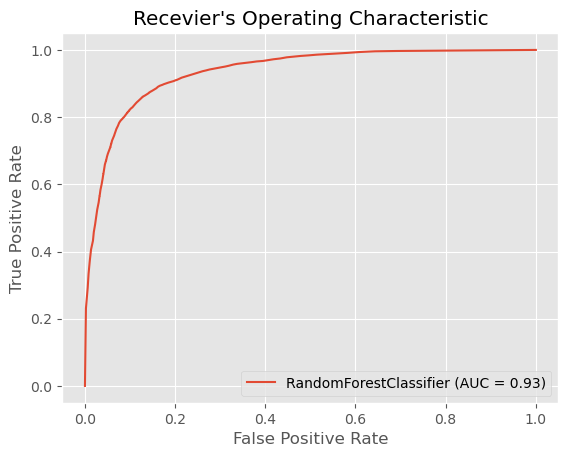

In [140]:

from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay

print("Accuracy Score of RFC model is", accuracy_score(y_test, pred_rfc)*100)
print("Confusion matrix for RFC Model is")
print(confusion_matrix(y_test, pred_rfc))
print("Classification Report of the RFC Model is")
print(classification_report(y_test, pred_rfc))

RocCurveDisplay.from_estimator(rfc, x_test, y_test) # arg. are model name, feature testing data, label testing data.
plt.title("Recevier's Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Accuracy Score of DTC model is 84.21135398647586
Confusion matrix for RFC Model is
[[5323 1033]
 [ 975 5387]]
Classification Report of the RFC Model is
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      6356
           1       0.84      0.85      0.84      6362

    accuracy                           0.84     12718
   macro avg       0.84      0.84      0.84     12718
weighted avg       0.84      0.84      0.84     12718



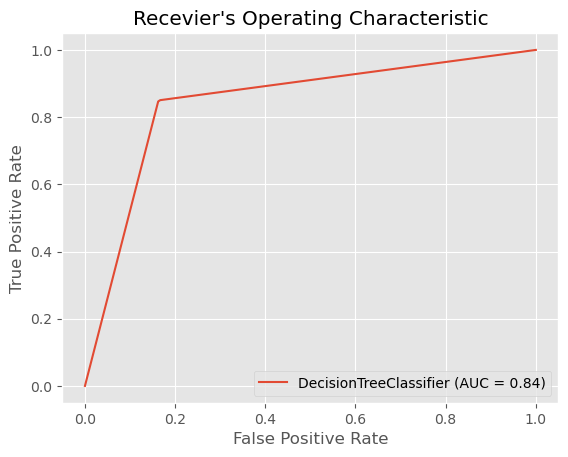

In [141]:
#DTC Model
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay

print("Accuracy Score of DTC model is", accuracy_score(y_test, pred_dtc)*100)
print("Confusion matrix for RFC Model is")
print(confusion_matrix(y_test, pred_dtc))
print("Classification Report of the RFC Model is")
print(classification_report(y_test, pred_dtc))

RocCurveDisplay.from_estimator(dtc, x_test, y_test) # arg. are model name, feature testing data, label testing data.
plt.title("Recevier's Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Accuracy Score of DTC model is 79.87891177858154
Confusion matrix for RFC Model is
[[4655 1701]
 [ 858 5504]]
Classification Report of the RFC Model is
              precision    recall  f1-score   support

           0       0.84      0.73      0.78      6356
           1       0.76      0.87      0.81      6362

    accuracy                           0.80     12718
   macro avg       0.80      0.80      0.80     12718
weighted avg       0.80      0.80      0.80     12718



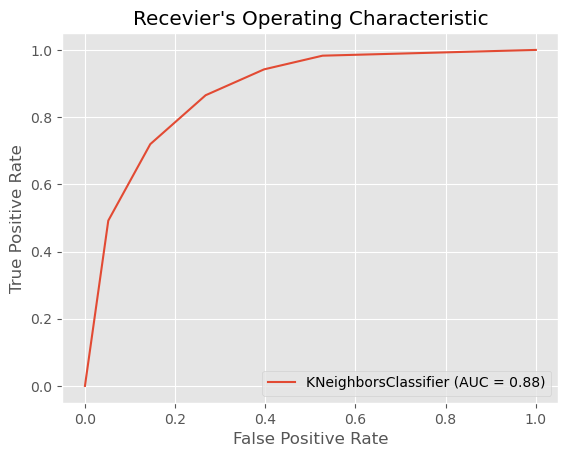

In [142]:
#KNC Model
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay

print("Accuracy Score of DTC model is", accuracy_score(y_test, pred_knc)*100)
print("Confusion matrix for RFC Model is")
print(confusion_matrix(y_test, pred_knc))
print("Classification Report of the RFC Model is")
print(classification_report(y_test, pred_knc))

RocCurveDisplay.from_estimator(knc, x_test, y_test) # arg. are model name, feature testing data, label testing data.
plt.title("Recevier's Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Accuracy Score of DTC model is 71.04890706085862
Confusion matrix for RFC Model is
[[4655 1701]
 [1981 4381]]
Classification Report of the RFC Model is
              precision    recall  f1-score   support

           0       0.70      0.73      0.72      6356
           1       0.72      0.69      0.70      6362

    accuracy                           0.71     12718
   macro avg       0.71      0.71      0.71     12718
weighted avg       0.71      0.71      0.71     12718



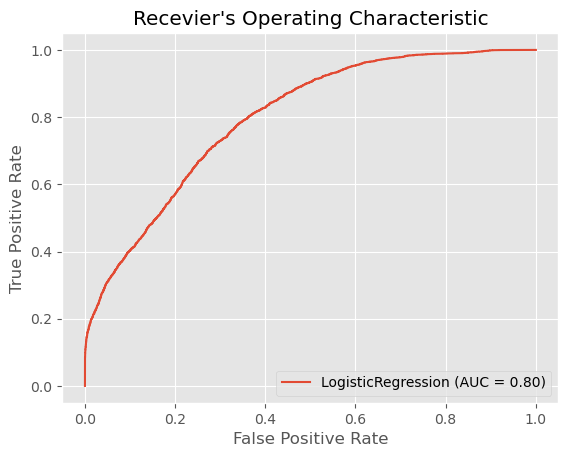

In [143]:
#LG Model
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay

print("Accuracy Score of DTC model is", accuracy_score(y_test, pred_lg)*100)
print("Confusion matrix for RFC Model is")
print(confusion_matrix(y_test, pred_lg))
print("Classification Report of the RFC Model is")
print(classification_report(y_test, pred_lg))

RocCurveDisplay.from_estimator(lg, x_test, y_test) # arg. are model name, feature testing data, label testing data.
plt.title("Recevier's Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
#LG Model
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay

print("Accuracy Score of DTC model is", accuracy_score(y_test, pred_svc)*100)
print("Confusion matrix for RFC Model is")
print(confusion_matrix(y_test, pred_svc))
print("Classification Report of the RFC Model is")
print(classification_report(y_test, pred_svc))

RocCurveDisplay.from_estimator(svc, x_test, y_test) # arg. are model name, feature testing data, label testing data.
plt.title("Recevier's Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Accuracy Score of DTC model is 73.83236357917912
Confusion matrix for RFC Model is
[[4042 2314]
 [1014 5348]]
Classification Report of the RFC Model is
              precision    recall  f1-score   support

           0       0.80      0.64      0.71      6356
           1       0.70      0.84      0.76      6362

    accuracy                           0.74     12718
   macro avg       0.75      0.74      0.74     12718
weighted avg       0.75      0.74      0.74     12718



Accuracy Score of RFC model is 86.8715524034673
Confusion matrix for RFC Model is
[[5433  894]
 [ 772 5591]]
Classification Report of the RFC Model is
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      6327
           1       0.86      0.88      0.87      6363

    accuracy                           0.87     12690
   macro avg       0.87      0.87      0.87     12690
weighted avg       0.87      0.87      0.87     12690



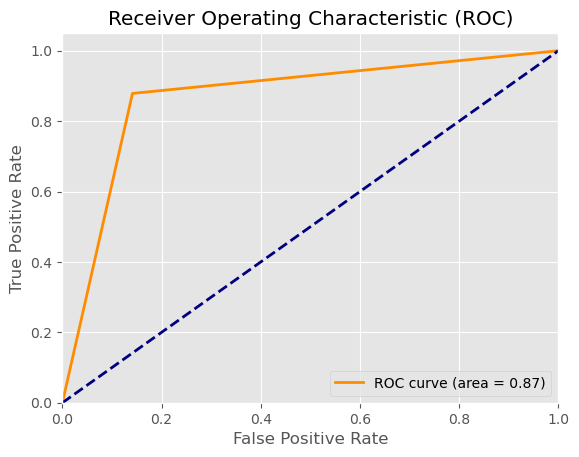

In [68]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt

# Assuming you have already trained your RFC model and obtained predictions 'pred_rfc'

print("Accuracy Score of RFC model is", accuracy_score(y_test, pred_rfc)*100)
print("Confusion matrix for RFC Model is")
print(confusion_matrix(y_test, pred_rfc))

print("Classification Report of the RFC Model is")
print(classification_report(y_test, pred_rfc))


# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, pred_rfc) # assuming y_test contains actual labels
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Accuracy Score of DTC model is 83.83766745468874
Confusion matrix for RFC Model is
[[5248 1079]
 [ 972 5391]]
Classification Report of the RFC Model is
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      6327
           1       0.83      0.85      0.84      6363

    accuracy                           0.84     12690
   macro avg       0.84      0.84      0.84     12690
weighted avg       0.84      0.84      0.84     12690



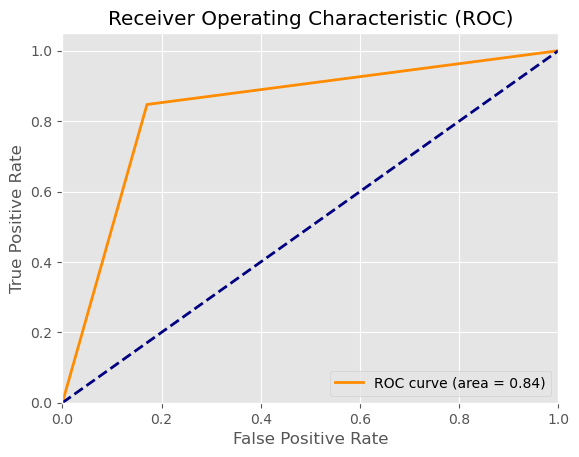

In [69]:
#DTC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt

# Assuming you have already trained your RFC model and obtained predictions 'pred_rfc'

print("Accuracy Score of DTC model is", accuracy_score(y_test, pred_dtc)*100)
print("Confusion matrix for RFC Model is")
print(confusion_matrix(y_test, pred_dtc))

print("Classification Report of the RFC Model is")
print(classification_report(y_test, pred_dtc))


# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, pred_dtc) # assuming y_test contains actual labels
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Accuracy Score of DTC model is 80.13396375098503
Confusion matrix for RFC Model is
[[4687 1640]
 [ 881 5482]]
Classification Report of the RFC Model is
              precision    recall  f1-score   support

           0       0.84      0.74      0.79      6327
           1       0.77      0.86      0.81      6363

    accuracy                           0.80     12690
   macro avg       0.81      0.80      0.80     12690
weighted avg       0.81      0.80      0.80     12690



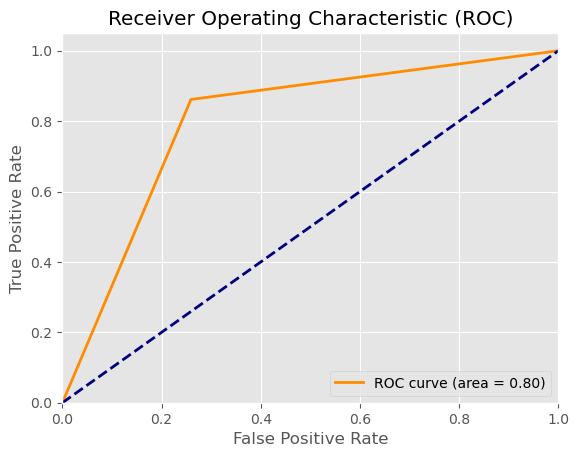

In [70]:
#KNC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt

# Assuming you have already trained your RFC model and obtained predictions 'pred_rfc'

print("Accuracy Score of DTC model is", accuracy_score(y_test, pred_knc)*100)
print("Confusion matrix for RFC Model is")
print(confusion_matrix(y_test, pred_knc))

print("Classification Report of the RFC Model is")
print(classification_report(y_test, pred_knc))


# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, pred_knc) # assuming y_test contains actual labels
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Accuracy Score of DTC model is 70.98502758077227
Confusion matrix for RFC Model is
[[4646 1681]
 [2001 4362]]
Classification Report of the RFC Model is
              precision    recall  f1-score   support

           0       0.70      0.73      0.72      6327
           1       0.72      0.69      0.70      6363

    accuracy                           0.71     12690
   macro avg       0.71      0.71      0.71     12690
weighted avg       0.71      0.71      0.71     12690



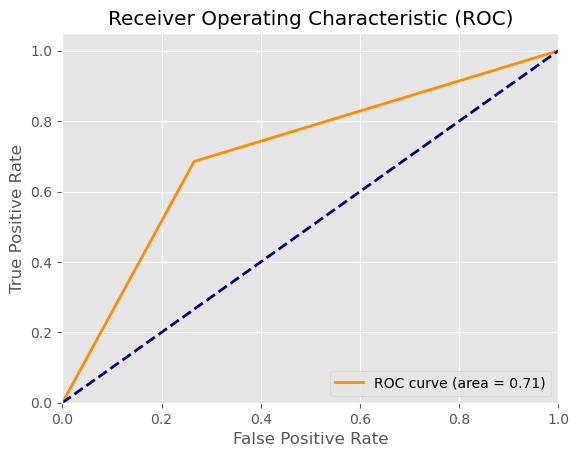

In [71]:
#LG
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt

# Assuming you have already trained your RFC model and obtained predictions 'pred_rfc'

print("Accuracy Score of DTC model is", accuracy_score(y_test, pred_lg)*100)
print("Confusion matrix for RFC Model is")
print(confusion_matrix(y_test, pred_lg))

print("Classification Report of the RFC Model is")
print(classification_report(y_test, pred_lg))


# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, pred_lg) # assuming y_test contains actual labels
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Accuracy Score of DTC model is 73.66430260047281
Confusion matrix for RFC Model is
[[4038 2289]
 [1053 5310]]
Classification Report of the RFC Model is
              precision    recall  f1-score   support

           0       0.79      0.64      0.71      6327
           1       0.70      0.83      0.76      6363

    accuracy                           0.74     12690
   macro avg       0.75      0.74      0.73     12690
weighted avg       0.75      0.74      0.73     12690



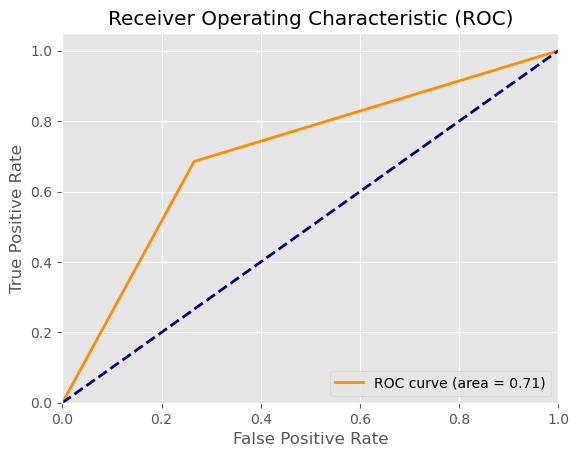

In [72]:
#SVC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt

# Assuming you have already trained your RFC model and obtained predictions 'pred_rfc'

print("Accuracy Score of DTC model is", accuracy_score(y_test, pred_svc)*100)
print("Confusion matrix for RFC Model is")
print(confusion_matrix(y_test, pred_svc))

print("Classification Report of the RFC Model is")
print(classification_report(y_test, pred_svc))


# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, pred_lg) # assuming y_test contains actual labels
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Model: Random Forest
Accuracy: 0.8690307328605201
Classification Report:              precision    recall  f1-score   support

           0       0.87      0.86      0.87      6327
           1       0.86      0.88      0.87      6363

    accuracy                           0.87     12690
   macro avg       0.87      0.87      0.87     12690
weighted avg       0.87      0.87      0.87     12690


Confusion Matrix:
[[5446  881]
 [ 781 5582]]

Model: Logistic Regression
Accuracy: 0.7098502758077226
Classification Report:              precision    recall  f1-score   support

           0       0.70      0.73      0.72      6327
           1       0.72      0.69      0.70      6363

    accuracy                           0.71     12690
   macro avg       0.71      0.71      0.71     12690
weighted avg       0.71      0.71      0.71     12690


Confusion Matrix:
[[4646 1681]
 [2001 4362]]

Model: Decision Tree
Accuracy: 0.8390070921985816
Classification Report:              precision    rec

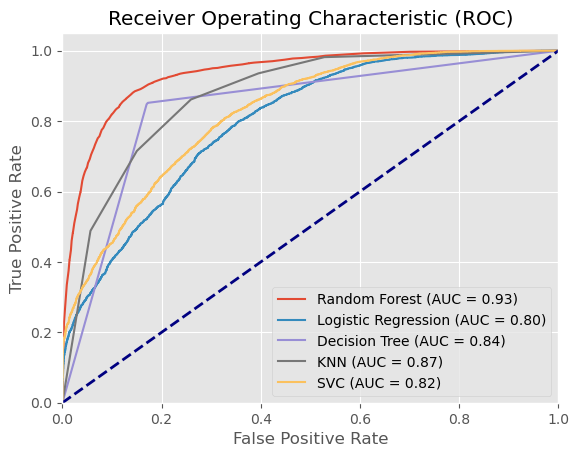

In [73]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC()
}

# Evaluate each model
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Classification Report:{classification_report(y_test, y_pred)}\n")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

    # ROC Curve
    if hasattr(model, "predict_proba"):
        if name == "SVC":
            y_scores = model.decision_function(x_test)
        else:
            y_scores = model.predict_proba(x_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_scores)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    elif name == "SVC":
        y_scores = model.decision_function(x_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_scores)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Model: Random Forest
Accuracy: 0.8668242710795903
Confusion Matrix:
[[5420  907]
 [ 783 5580]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      6327
           1       0.86      0.88      0.87      6363

    accuracy                           0.87     12690
   macro avg       0.87      0.87      0.87     12690
weighted avg       0.87      0.87      0.87     12690



Model: Logistic Regression
Accuracy: 0.7098502758077226
Confusion Matrix:
[[4646 1681]
 [2001 4362]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.73      0.72      6327
           1       0.72      0.69      0.70      6363

    accuracy                           0.71     12690
   macro avg       0.71      0.71      0.71     12690
weighted avg       0.71      0.71      0.71     12690



Model: Decision Tree
Accuracy: 0.8379038613081167
Confusion Matrix:
[[5255 1072]
 [ 985 5378]]
Class

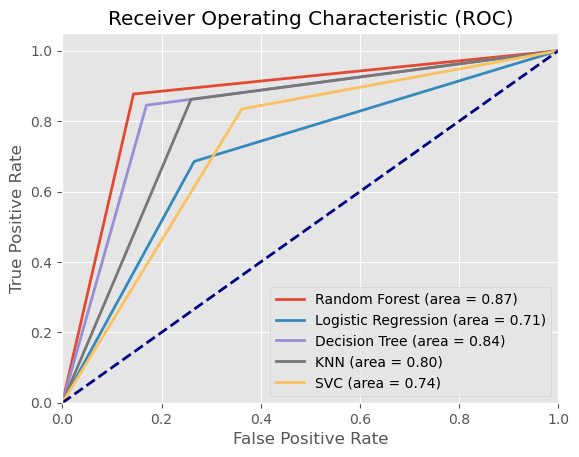

In [74]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC()
}


# Train and evaluate each model
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")
    print("\n")
    
    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(y_test, y_pred) # assuming y_test contains actual labels
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label='%s (area = %0.2f)' % (name, roc_auc))

# Plot ROC curve for all models
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()